# A Finite Element Examples: Truss 03

This example shows how to run the truss03 example distributed with FEM.edu

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

## Loading the Example

In [2]:
from femedu.examples.trusses.truss03 import *

# load the example
ex = ExampleTruss03()

# print the doc-string for the current example
print(ex)

Example ExampleTruss03
^^^^^^^^^^^^^^^^^^^^^^^

        Simple triangular truss. 
        
        This example is structurally identical to ExampleTruss01 but utilizes 
        the alternative input style for adding Nodes and Elements to the model.
        
        The system is statically determined and allows for easy validation of 
        calculated deformation, reactions and internal forces.
        
        Author: Peter Mackenzie-Helnwein 
        



## Running the Example


System Analysis Report

Nodes:
---------------------
  Node 0: {'ux': 0, 'uy': 1}
          x:[0. 0.], fix:['ux', 'uy'], 
          P:[0. 0.], u:[0. 0.]
  Node 1: {'ux': 0, 'uy': 1}
          x:[72.  0.], fix:['uy'], 
          P:[0. 0.], u:[3.6 0. ]
  Node 2: {'ux': 0, 'uy': 1}
          x:[36. 36.], fix:[], 
          P:[ 0. -1.], u:[ 1.8        -6.89116882]

Elements:
---------------------
  Truss: node 0 to node 1:
     material properties: FiberMaterial(Material)({'E': 10.0, 'A': 1.0, 'nu': 0.0, 'fy': 1e+30})  strain:0.04761904761904761   stress:{'xx': 0.4761904761904761, 'yy': 0.0, 'zz': 0.0, 'xy': 0.0}  
     internal force: 0.4761904761904761
     Pe: [ 0.4761904761904761 0.0 ]
  Truss: node 0 to node 2:
     material properties: FiberMaterial(Material)({'E': 10.0, 'A': 1.0, 'nu': 0.0, 'fy': 1e+30})  strain:-0.05823563981487166   stress:{'xx': -0.5823563981487166, 'yy': 0.0, 'zz': 0.0, 'xy': 0.0}  
     internal force: -0.5823563981487166
     Pe: [ -0.46140136076020055 -0.355

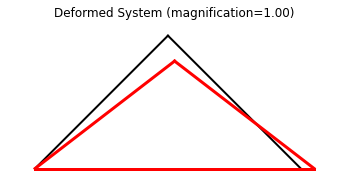


System Analysis Report

Nodes:
---------------------
  Node 0: {'ux': 0, 'uy': 1}
          x:[0. 0.], fix:['ux', 'uy'], 
          P:[0. 0.], u:[0. 0.]
  Node 1: {'ux': 0, 'uy': 1}
          x:[72.  0.], fix:['uy', 'ux'], 
          P:[0. 0.], u:[0. 0.]
  Node 2: {'ux': 0, 'uy': 1}
          x:[36. 36.], fix:[], 
          P:[ 0. -1.], u:[ 0.         -5.09116882]

Elements:
---------------------
  Truss: node 0 to node 1:
     material properties: FiberMaterial(Material)({'E': 10.0, 'A': 1.0, 'nu': 0.0, 'fy': 1e+30})  strain:0.0   stress:{'xx': 0.0, 'yy': 0.0, 'zz': 0.0, 'xy': 0.0}  
     internal force: 0.0
     Pe: [ 0.0 0.0 ]
  Truss: node 0 to node 2:
     material properties: FiberMaterial(Material)({'E': 10.0, 'A': 1.0, 'nu': 0.0, 'fy': 1e+30})  strain:-0.06989658167930027   stress:{'xx': -0.6989658167930026, 'yy': 0.0, 'zz': 0.0, 'xy': 0.0}  
     internal force: -0.6989658167930026
     Pe: [ -0.530317996923979 -0.4553197065619366 ]
  Truss: node 1 to node 2:
     material pr

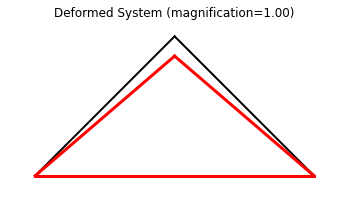

In [3]:
# run the actual problem
ex.run()


## More information

You can find the example input in `femedu/examples/trusses/truss02.py`

In [4]:
from IPython.display import Code

Code(filename='../femedu/examples/trusses/truss03.py', language='python')


"""
Example
"""
from ...examples.Example import *

from ...domain.System import *
from ...domain.Node import *
from ...elements.Truss import *
from ...materials.FiberMaterial import *


class ExampleTruss03(Example):

    def docString(self):
        s = """
        Simple triangular truss. 
        
        This example is structurally identical to ExampleTruss01 but utilizes 
        the alternative input style for adding Nodes and Elements to the model.
        
        The system is statically determined and allows for easy validation of 
        calculated deformation, reactions and internal forces.
        
        Author: Peter Mackenzie-Helnwein 
        """
        return s

    def problem(self):
        # initialize a system model
        B = 6.0 * 12
        H = 3.0 * 12
        params = {'E': 10., 'A': 1., 'nu': 0.0, 'fy': 1.e30}

        model = System()

        # create nodes
        nd0 = Node(0.0, 0.0)
        nd1 = Node(  B, 0.0)
        nd2 = Node(0.5*B, H)

        model += nd0
        model += nd1
        model += nd2

        # create elements
        model += Truss(nd0, nd1, FiberMaterial(params))  # bottom 1
        model += Truss(nd0, nd2, FiberMaterial(params))  # up right diag 1
        model += Truss(nd1, nd2, FiberMaterial(params))  # up left diag 1

        # define support(s)
        nd0.fixDOF('ux')    # horizontal support left end
        #nd0 //= 0
        nd0.fixDOF('uy')    # vertical support left end
        nd1.fixDOF('uy')    # vertical support right end

        # add loads
        # .. load only the upper nodes
        nd2.setLoad((0.0, -1.0), ('ux','uy'))

        # analyze the model
        model.solve()

        # write out report
        model.report()

        # create plots
        model.plot(factor=1., filename="truss03_deformed_a.png")

        # fix horizontal motion of node 1
        nd1.fixDOF('ux')

        # add loads: same load -- nothing to do

        # RE-analyze the model
        model.resetDisp()
        model.solve()

        # skip the report
        model.report()

        # create plots
        model.plot(factor=1., filename="truss03_deformed_b.png")